<a href="https://colab.research.google.com/github/NehaKumari500092077/Bird-Species-Identification/blob/main/validate2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import tensorflow as tf
tf.config.run_functions_eagerly(True)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

IMAGE_SIZE = [224, 224]

In [4]:
#Give dataset path
train_path = '/content/drive/MyDrive/BirdDatabase/Dataset/train'
test_path = '/content/drive/MyDrive/BirdDatabase/Dataset/test'

Working with 427 images
Image examples: 
Cuckoo1-XC100628 - Common Cuckoo - Cuculus canorus-001.jpg


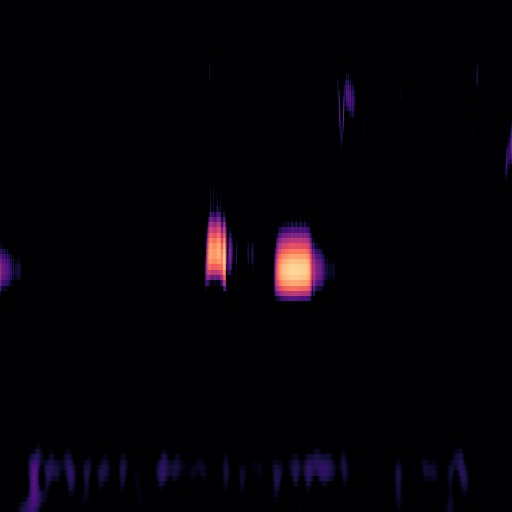

Cuckoo1-XC100628 - Common Cuckoo - Cuculus canorus-000.jpg


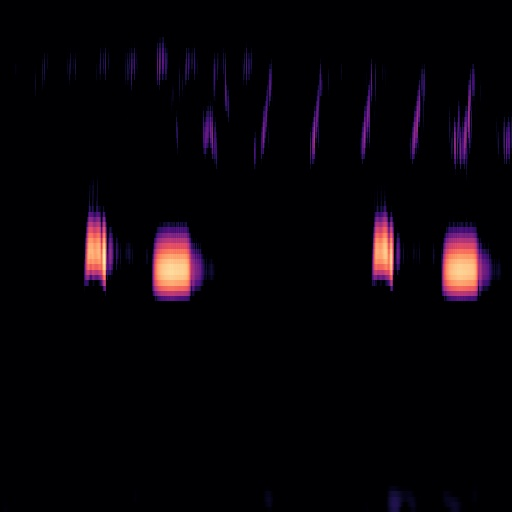

Cuckoo1-XC100628 - Common Cuckoo - Cuculus canorus-003.jpg


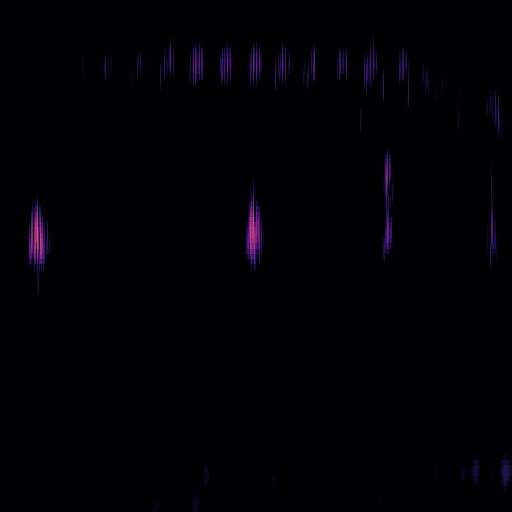

Cuckoo1-XC100628 - Common Cuckoo - Cuculus canorus-002.jpg


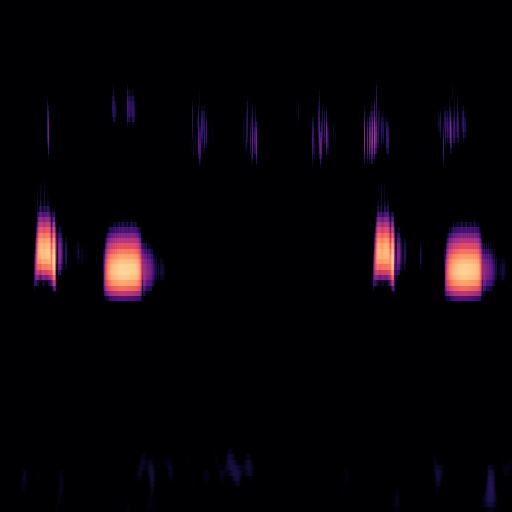

Cuckoo1-XC100817 - Common Cuckoo - Cuculus canorus-000.jpg


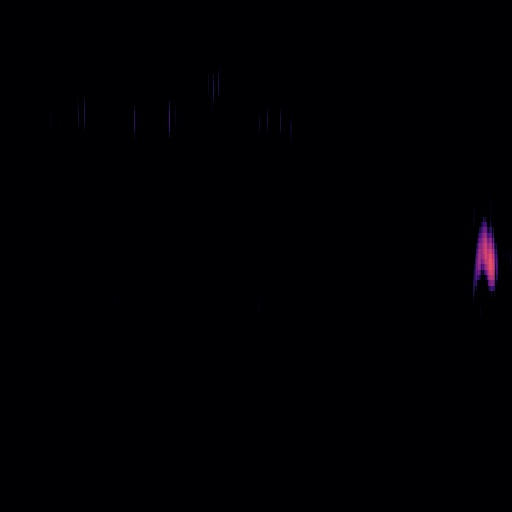

Cuckoo1-XC100817 - Common Cuckoo - Cuculus canorus-001.jpg


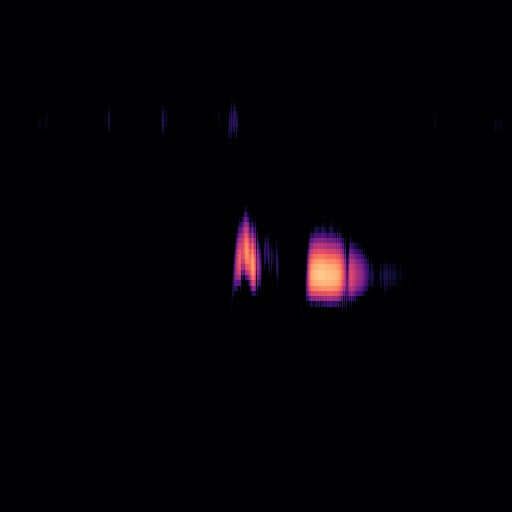

Cuckoo1-XC100817 - Common Cuckoo - Cuculus canorus-002.jpg


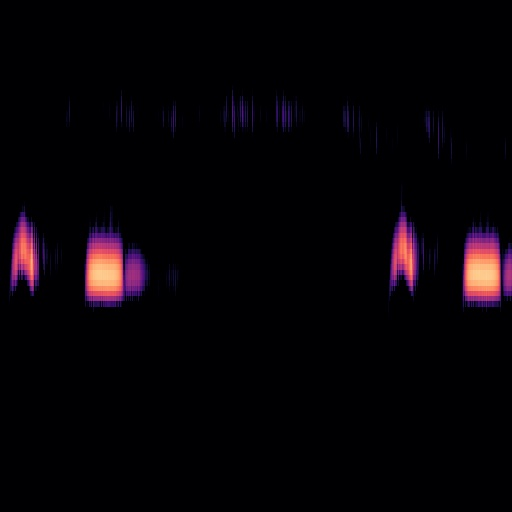

Cuckoo1-XC100817 - Common Cuckoo - Cuculus canorus-004.jpg


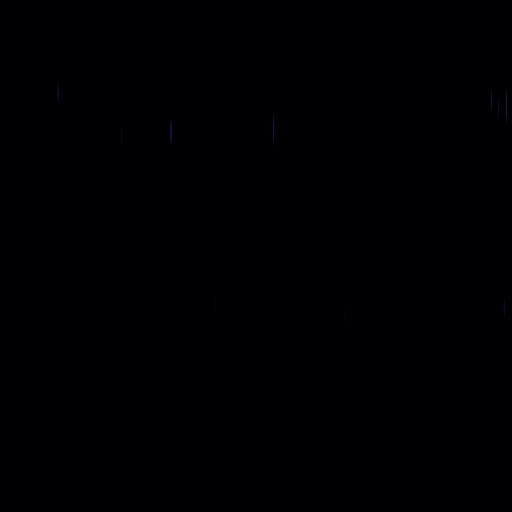

Cuckoo1-XC100817 - Common Cuckoo - Cuculus canorus-003.jpg


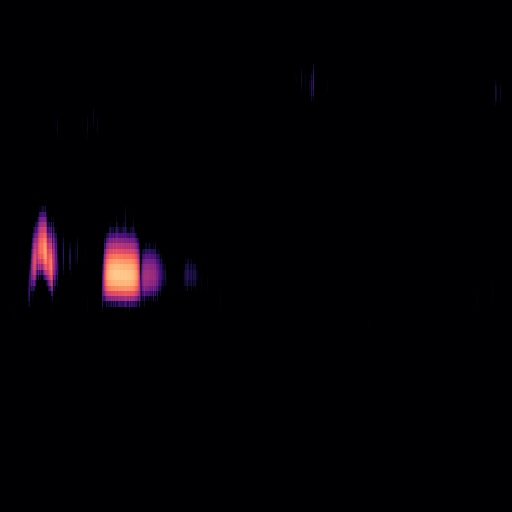

Cuckoo1-XC100817 - Common Cuckoo - Cuculus canorus-005.jpg


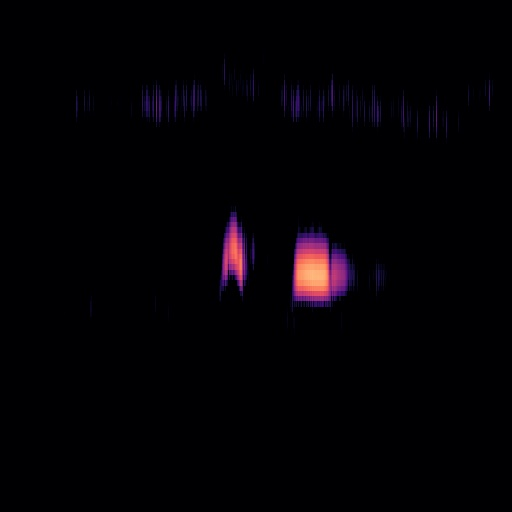

In [5]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/Cuckoo'


onlybenignfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {0} images".format(len(onlybenignfiles)))
print("Image examples: ")


for i in range(10):
    print(onlybenignfiles[i])
    display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))

In [6]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 2s 0us/step


In [7]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [8]:
for layer in vgg.layers:
  layer.trainable = False

In [9]:
folders = glob('/content/drive/MyDrive/BirdDatabase/Dataset/train/*')
print(len(folders))

2


In [10]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='sigmoid')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
from keras import optimizers


adam = optimizers.Adam()
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [12]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [13]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [27]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 111,
                                                 class_mode = 'categorical')


Found 541 images belonging to 2 classes.


In [28]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 111,
                                            class_mode = 'categorical')

Found 111 images belonging to 2 classes.


In [29]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='/content/drive/MyDrive/BirdDatabase/Birdmodel1.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit(
  train_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=5,
  validation_steps=2,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100



Epoch 1: val_loss improved from inf to 3.34684, saving model to /content/drive/MyDrive/BirdDatabase/mymodel2.h5
5/5 - 16s - loss: 0.3477 - accuracy: 0.9464 - val_loss: 3.3468 - val_accuracy: 0.7748 - 16s/epoch - 3s/step
Epoch 2/100


5/5 - 8s - loss: 0.3560 - accuracy: 0.9482 - 8s/epoch - 2s/step
Epoch 3/100


5/5 - 8s - loss: 0.4019 - accuracy: 0.9335 - 8s/epoch - 2s/step
Epoch 4/100


5/5 - 8s - loss: 0.3257 - accuracy: 0.9353 - 8s/epoch - 2s/step
Epoch 5/100


5/5 - 8s - loss: 0.2908 - accuracy: 0.9575 - 8s/epoch - 2s/step
Epoch 6/100


5/5 - 8s - loss: 0.2438 - accuracy: 0.9390 - 8s/epoch - 2s/step
Epoch 7/100


5/5 - 8s - loss: 0.3122 - accuracy: 0.9316 - 8s/epoch - 2s/step
Epoch 8/100


5/5 - 8s - loss: 0.3048 - accuracy: 0.9445 - 8s/epoch - 2s/step
Epoch 9/100


5/5 - 8s - loss: 0.2184 - accuracy: 0.9519 - 8s/epoch - 2s/step
Epoch 10/100


5/5 - 8s - loss: 0.3544 - accuracy: 0.9353 - 8s/epoch - 2s/step
Epoch 11/100


5/5 - 8s - loss: 0.2381 - accuracy: 0.9501 - 8s/epoch - 2s/step
Epoch 12/100


5/5 - 8s - loss: 0.2453 - accuracy: 0.9482 - 8s/epoch - 2s/step
Epoch 13/100


5/5 - 8s - loss: 0.2655 - accuracy: 0.9372 - 8s/epoch - 2s/step
Epoch 14/100


5/5 - 8s - loss: 0.1746 - accuracy: 0.9556 - 8s/epoch - 2s/step
Epoch 15/100


5/5 - 8s - loss: 0.2471 - accuracy: 0.9482 - 8s/epoch - 2s/step
Epoch 16/100


5/5 - 8s - loss: 0.2130 - accuracy: 0.9556 - 8s/epoch - 2s/step
Epoch 17/100


5/5 - 8s - loss: 0.2063 - accuracy: 0.9538 - 8s/epoch - 2s/step
Epoch 18/100


5/5 - 8s - loss: 0.1839 - accuracy: 0.9593 - 8s/epoch - 2s/step
Epoch 19/100


5/5 - 8s - loss: 0.2092 - accuracy: 0.9538 - 8s/epoch - 2s/step
Epoch 20/100


5/5 - 8s - loss: 0.2076 - accuracy: 0.9464 - 8s/epoch - 2s/step
Epoch 21/100


5/5 - 8s - loss: 0.1910 - accuracy: 0.9593 - 8s/epoch - 2s/step
Epoch 22/100


5/5 - 8s - loss: 0.1824 - accuracy: 0.9538 - 8s/epoch - 2s/step
Epoch 23/100


5/5 - 8s - loss: 0.1740 - accuracy: 0.9501 - 8s/epoch - 2s/step
Epoch 24/100


5/5 - 8s - loss: 0.1898 - accuracy: 0.9501 - 8s/epoch - 2s/step
Epoch 25/100


5/5 - 8s - loss: 0.2318 - accuracy: 0.9445 - 8s/epoch - 2s/step
Epoch 26/100


5/5 - 8s - loss: 0.1640 - accuracy: 0.9556 - 8s/epoch - 2s/step
Epoch 27/100


5/5 - 8s - loss: 0.2386 - accuracy: 0.9501 - 8s/epoch - 2s/step
Epoch 28/100


5/5 - 8s - loss: 0.1711 - accuracy: 0.9538 - 8s/epoch - 2s/step
Epoch 29/100


5/5 - 8s - loss: 0.2427 - accuracy: 0.9556 - 8s/epoch - 2s/step
Epoch 30/100


5/5 - 8s - loss: 0.2314 - accuracy: 0.9482 - 8s/epoch - 2s/step
Epoch 31/100


5/5 - 8s - loss: 0.1421 - accuracy: 0.9575 - 8s/epoch - 2s/step
Epoch 32/100


5/5 - 8s - loss: 0.1258 - accuracy: 0.9630 - 8s/epoch - 2s/step
Epoch 33/100


5/5 - 8s - loss: 0.1313 - accuracy: 0.9704 - 8s/epoch - 2s/step
Epoch 34/100


5/5 - 8s - loss: 0.1786 - accuracy: 0.9556 - 8s/epoch - 2s/step
Epoch 35/100


5/5 - 8s - loss: 0.1874 - accuracy: 0.9575 - 8s/epoch - 2s/step
Epoch 36/100


5/5 - 8s - loss: 0.1546 - accuracy: 0.9630 - 8s/epoch - 2s/step
Epoch 37/100


5/5 - 8s - loss: 0.1687 - accuracy: 0.9575 - 8s/epoch - 2s/step
Epoch 38/100


5/5 - 8s - loss: 0.1849 - accuracy: 0.9649 - 8s/epoch - 2s/step
Epoch 39/100


5/5 - 8s - loss: 0.2644 - accuracy: 0.9519 - 8s/epoch - 2s/step
Epoch 40/100


5/5 - 8s - loss: 0.1570 - accuracy: 0.9630 - 8s/epoch - 2s/step
Epoch 41/100


5/5 - 8s - loss: 0.1367 - accuracy: 0.9667 - 8s/epoch - 2s/step
Epoch 42/100


5/5 - 8s - loss: 0.1834 - accuracy: 0.9538 - 8s/epoch - 2s/step
Epoch 43/100


5/5 - 8s - loss: 0.2224 - accuracy: 0.9538 - 8s/epoch - 2s/step
Epoch 44/100


5/5 - 8s - loss: 0.1440 - accuracy: 0.9649 - 8s/epoch - 2s/step
Epoch 45/100


5/5 - 8s - loss: 0.1368 - accuracy: 0.9630 - 8s/epoch - 2s/step
Epoch 46/100


5/5 - 8s - loss: 0.1374 - accuracy: 0.9704 - 8s/epoch - 2s/step
Epoch 47/100


5/5 - 8s - loss: 0.1271 - accuracy: 0.9667 - 8s/epoch - 2s/step
Epoch 48/100


5/5 - 8s - loss: 0.1528 - accuracy: 0.9630 - 8s/epoch - 2s/step
Epoch 49/100


5/5 - 8s - loss: 0.1701 - accuracy: 0.9612 - 8s/epoch - 2s/step
Epoch 50/100


5/5 - 8s - loss: 0.1659 - accuracy: 0.9649 - 8s/epoch - 2s/step
Epoch 51/100


5/5 - 8s - loss: 0.1828 - accuracy: 0.9741 - 8s/epoch - 2s/step
Epoch 52/100


5/5 - 8s - loss: 0.1388 - accuracy: 0.9667 - 8s/epoch - 2s/step
Epoch 53/100


5/5 - 8s - loss: 0.2204 - accuracy: 0.9501 - 8s/epoch - 2s/step
Epoch 54/100


5/5 - 8s - loss: 0.1172 - accuracy: 0.9704 - 8s/epoch - 2s/step
Epoch 55/100


5/5 - 8s - loss: 0.2010 - accuracy: 0.9501 - 8s/epoch - 2s/step
Epoch 56/100


5/5 - 8s - loss: 0.1489 - accuracy: 0.9630 - 8s/epoch - 2s/step
Epoch 57/100


5/5 - 8s - loss: 0.1784 - accuracy: 0.9501 - 8s/epoch - 2s/step
Epoch 58/100


5/5 - 8s - loss: 0.1372 - accuracy: 0.9649 - 8s/epoch - 2s/step
Epoch 59/100


5/5 - 8s - loss: 0.1327 - accuracy: 0.9667 - 8s/epoch - 2s/step
Epoch 60/100


5/5 - 8s - loss: 0.1531 - accuracy: 0.9630 - 8s/epoch - 2s/step
Epoch 61/100


5/5 - 8s - loss: 0.1349 - accuracy: 0.9630 - 8s/epoch - 2s/step
Epoch 62/100


5/5 - 8s - loss: 0.0897 - accuracy: 0.9797 - 8s/epoch - 2s/step
Epoch 63/100


5/5 - 8s - loss: 0.1108 - accuracy: 0.9575 - 8s/epoch - 2s/step
Epoch 64/100


5/5 - 8s - loss: 0.1267 - accuracy: 0.9686 - 8s/epoch - 2s/step
Epoch 65/100


5/5 - 8s - loss: 0.1071 - accuracy: 0.9778 - 8s/epoch - 2s/step
Epoch 66/100


5/5 - 8s - loss: 0.1898 - accuracy: 0.9593 - 8s/epoch - 2s/step
Epoch 67/100


5/5 - 8s - loss: 0.1300 - accuracy: 0.9704 - 8s/epoch - 2s/step
Epoch 68/100


5/5 - 8s - loss: 0.1020 - accuracy: 0.9760 - 8s/epoch - 2s/step
Epoch 69/100


5/5 - 8s - loss: 0.1300 - accuracy: 0.9630 - 8s/epoch - 2s/step
Epoch 70/100


5/5 - 8s - loss: 0.1321 - accuracy: 0.9741 - 8s/epoch - 2s/step
Epoch 71/100


5/5 - 8s - loss: 0.1280 - accuracy: 0.9723 - 8s/epoch - 2s/step
Epoch 72/100


5/5 - 8s - loss: 0.1110 - accuracy: 0.9741 - 8s/epoch - 2s/step
Epoch 73/100


5/5 - 8s - loss: 0.1104 - accuracy: 0.9630 - 8s/epoch - 2s/step
Epoch 74/100


5/5 - 8s - loss: 0.1439 - accuracy: 0.9556 - 8s/epoch - 2s/step
Epoch 75/100


5/5 - 8s - loss: 0.1371 - accuracy: 0.9686 - 8s/epoch - 2s/step
Epoch 76/100


5/5 - 8s - loss: 0.1502 - accuracy: 0.9612 - 8s/epoch - 2s/step
Epoch 77/100


5/5 - 8s - loss: 0.1093 - accuracy: 0.9741 - 8s/epoch - 2s/step
Epoch 78/100


5/5 - 8s - loss: 0.2068 - accuracy: 0.9612 - 8s/epoch - 2s/step
Epoch 79/100


5/5 - 8s - loss: 0.2164 - accuracy: 0.9556 - 8s/epoch - 2s/step
Epoch 80/100


5/5 - 8s - loss: 0.1101 - accuracy: 0.9723 - 8s/epoch - 2s/step
Epoch 81/100


5/5 - 8s - loss: 0.1529 - accuracy: 0.9630 - 8s/epoch - 2s/step
Epoch 82/100


5/5 - 8s - loss: 0.1354 - accuracy: 0.9667 - 8s/epoch - 2s/step
Epoch 83/100


5/5 - 8s - loss: 0.1471 - accuracy: 0.9612 - 8s/epoch - 2s/step
Epoch 84/100


5/5 - 8s - loss: 0.1235 - accuracy: 0.9704 - 8s/epoch - 2s/step
Epoch 85/100


5/5 - 8s - loss: 0.1784 - accuracy: 0.9556 - 8s/epoch - 2s/step
Epoch 86/100


5/5 - 8s - loss: 0.1239 - accuracy: 0.9741 - 8s/epoch - 2s/step
Epoch 87/100


5/5 - 8s - loss: 0.2441 - accuracy: 0.9575 - 8s/epoch - 2s/step
Epoch 88/100


5/5 - 8s - loss: 0.1220 - accuracy: 0.9741 - 8s/epoch - 2s/step
Epoch 89/100


5/5 - 8s - loss: 0.1900 - accuracy: 0.9556 - 8s/epoch - 2s/step
Epoch 90/100


5/5 - 8s - loss: 0.1159 - accuracy: 0.9741 - 8s/epoch - 2s/step
Epoch 91/100


5/5 - 8s - loss: 0.1420 - accuracy: 0.9723 - 8s/epoch - 2s/step
Epoch 92/100


5/5 - 8s - loss: 0.1229 - accuracy: 0.9649 - 8s/epoch - 2s/step
Epoch 93/100


5/5 - 8s - loss: 0.2363 - accuracy: 0.9556 - 8s/epoch - 2s/step
Epoch 94/100


5/5 - 8s - loss: 0.1062 - accuracy: 0.9723 - 8s/epoch - 2s/step
Epoch 95/100


5/5 - 8s - loss: 0.0914 - accuracy: 0.9778 - 8s/epoch - 2s/step
Epoch 96/100


5/5 - 8s - loss: 0.1323 - accuracy: 0.9797 - 8s/epoch - 2s/step
Epoch 97/100


5/5 - 8s - loss: 0.1315 - accuracy: 0.9667 - 8s/epoch - 2s/step
Epoch 98/100


5/5 - 8s - loss: 0.1647 - accuracy: 0.9667 - 8s/epoch - 2s/step
Epoch 99/100


5/5 - 8s - loss: 0.1364 - accuracy: 0.9686 - 8s/epoch - 2s/step
Epoch 100/100


5/5 - 8s - loss: 0.0651 - accuracy: 0.9815 - 8s/epoch - 2s/step
Training completed in time:  0:12:51.983300


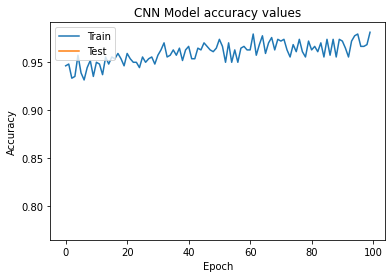

In [30]:
_# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [31]:
from keras import models  
model = models.load_model('/content/drive/MyDrive/BirdDatabase/Birdmodel1.h5')


In [32]:
train_set.class_indices

{'Cuckoo': 0, 'Himalayan Bulbul': 1}

/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 0s 25ms/step
Confusion matrix, without normalization
[[17  8]
 [18 68]]


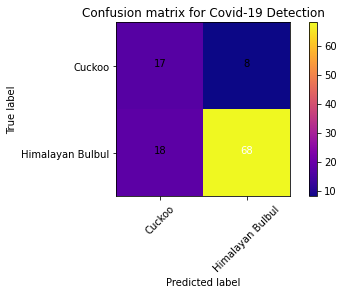

In [34]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import itertools
import numpy as np
import matplotlib.pyplot as plt
import keras.utils as image

y_actual = []
y_test = []

for i in os.listdir("/content/drive/MyDrive/BirdDatabase/Dataset/test/Cuckoo"):
  img = image.load_img("/content/drive/MyDrive/BirdDatabase/Dataset/test/Cuckoo/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = (model.predict(img) > 0.5).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(1)

for i in os.listdir("/content/drive/MyDrive/BirdDatabase/Dataset/test/Himalayan Bulbul"):
  img = image.load_img("/content/drive/MyDrive/BirdDatabase/Dataset/test/Himalayan Bulbul/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = (model.predict(img) > 0.5).astype("int32")
  y_test.append(p[0,0])
  y_actual.append(0)

y_actual = np.array(y_actual)
y_test = np.array(y_test)

cm = confusion_matrix(y_actual,y_test)

class_names = ["Cuckoo","Himalayan Bulbul"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



plt.figure()
plot_confusion_matrix(cm, classes=class_names,
                      title='Confusion matrix for Covid-19 Detection',cmap="plasma")


1/1 [==============================] - 0s 31ms/step


/usr/local/lib/python3.8/dist-packages/tensorflow/python/data/ops/structured_function.py:264: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


This Scalogram Image is of bulbul
Prediction Of Our Model :  Himalayan Bulbul


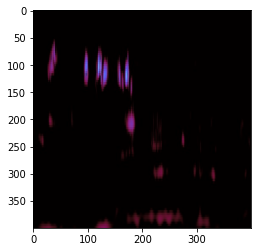

In [35]:
import numpy as np
# from google.colab.patches import cv2_imshow
import cv2
#from keras.preprocessing import image
import keras.utils as image


test_image = '/content/drive/MyDrive/BirdDatabase/Dataset/validate/Himalayan Bulbul/xento-canto-XC115315 - Himalayan Bulbul - Pycnonotus leucogenys-003.jpg'
xtest_image = image.load_img(test_image, target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
#results = model.predict(xtest_image)
results = (model.predict(xtest_image) > 0.5).astype("int32")
# training_set.class_indices
imggg = cv2.imread(test_image)
print("This Scalogram Image is of bulbul")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Cuckoo'
else:
    prediction = 'Himalayan Bulbul'
print("Prediction Of Our Model : ",prediction)


In [ ]:
#bulbul
results

array([[0, 1]], dtype=int32)

1/1 [==============================] - 0s 30ms/step
This Scalogram Image is of cuckoo
Prediction Of Our Model :  Himalayan Bulbul


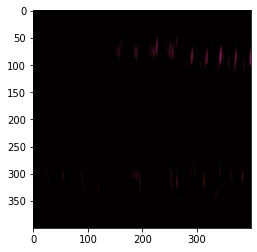

In [39]:
import numpy as np
# from google.colab.patches import cv2_imshow
import cv2
#from keras.preprocessing import image
import keras.utils as image


test_image = '/content/drive/MyDrive/BirdDatabase/Dataset/validate/Cuckoo/Cuckoo1-XC53835 - Common Cuckoo - Cuculus canorus-006.jpg'
xtest_image = image.load_img(test_image, target_size = (224, 224))
xtest_image = image.img_to_array(xtest_image)
xtest_image = np.expand_dims(xtest_image, axis = 0)
#results = model.predict(xtest_image)
results = (model.predict(xtest_image) > 0.5).astype("int32")
# training_set.class_indices
imggg = cv2.imread(test_image)
print("This Scalogram Image is of cuckoo")
imggg = np.array(imggg)
imggg = cv2.resize(imggg,(400,400))
plt.imshow(imggg)
# cv2_imshow(imggg)
# print(results)
if results[0][0] == 0:
    prediction = 'Cuckoo'
else:
    prediction = 'Himalayan Bulbul'
print("Prediction Of Our Model : ",prediction)

In [40]:
#cuckoo
results

array([[1, 0]], dtype=int32)